<a href="https://colab.research.google.com/github/mehrdadkazemi254/MachineLearning/blob/main/CategoricalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Here we represent three methods to deal with categorical data:**


1.   Delete them
2.   Ordinal encoding (for ordinal variables)
3.   One-Hot encoding (for nominal variables)



Below we compare the effectiveness of each method by comparing mean absolute error(MAE)

here you can find the data: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('melb_data.csv')

y = data["Price"]
X = data.drop(['Price'], axis= 1)

X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size= 0.8, random_state= 0)

#to deal with missing values, we simply drop the columns with missing values

missing_cols = [col for col in X.columns if X[col].isnull().any()]

X_train = X_train.drop(missing_cols, axis=1, )
X_valid = X_valid.drop(missing_cols, axis=1, )

In [23]:
#next, we identify the columns with categorical data AND low cardinality(number of unique elements)
# nunique() function returns the number of unique elements or cardinality of a column

low_card_col = [cardcol for cardcol in X_train.columns if X_train[cardcol].dtype == 'object' and X_train[cardcol].nunique() < 10 ]

#we also want all the columns with numerical values

num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

cols = num_cols + low_card_col

X_train = X_train[cols]
X_valid = X_valid[cols]

#now, we want to have the list of all of the categorical variables in our data

categorical_col = [col for col in X_train.columns if X_train[col].dtype =='object']
print(categorical_col)

['Type', 'Method', 'Regionname']


In [26]:
#define a function to measure MAE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def get_mae(X_train, X_valid, y_train, y_valid):
  model = RandomForestRegressor(n_estimators=100, random_state=0)
  model.fit(X_train,y_train)
  predictions = model.predict(X_valid)
  return mean_absolute_error(y_valid, predictions)

**Approach 1:**

Droping the Columns

In [29]:
X_train_reduced = X_train.select_dtypes(exclude= ['object'])
X_valid_reduced = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(get_mae(X_train_reduced,X_valid_reduced,y_train,y_valid))

MAE from Approach 1 (Drop categorical variables):
175703.48185157913


**Approach 2:**

Ordinal Encoding

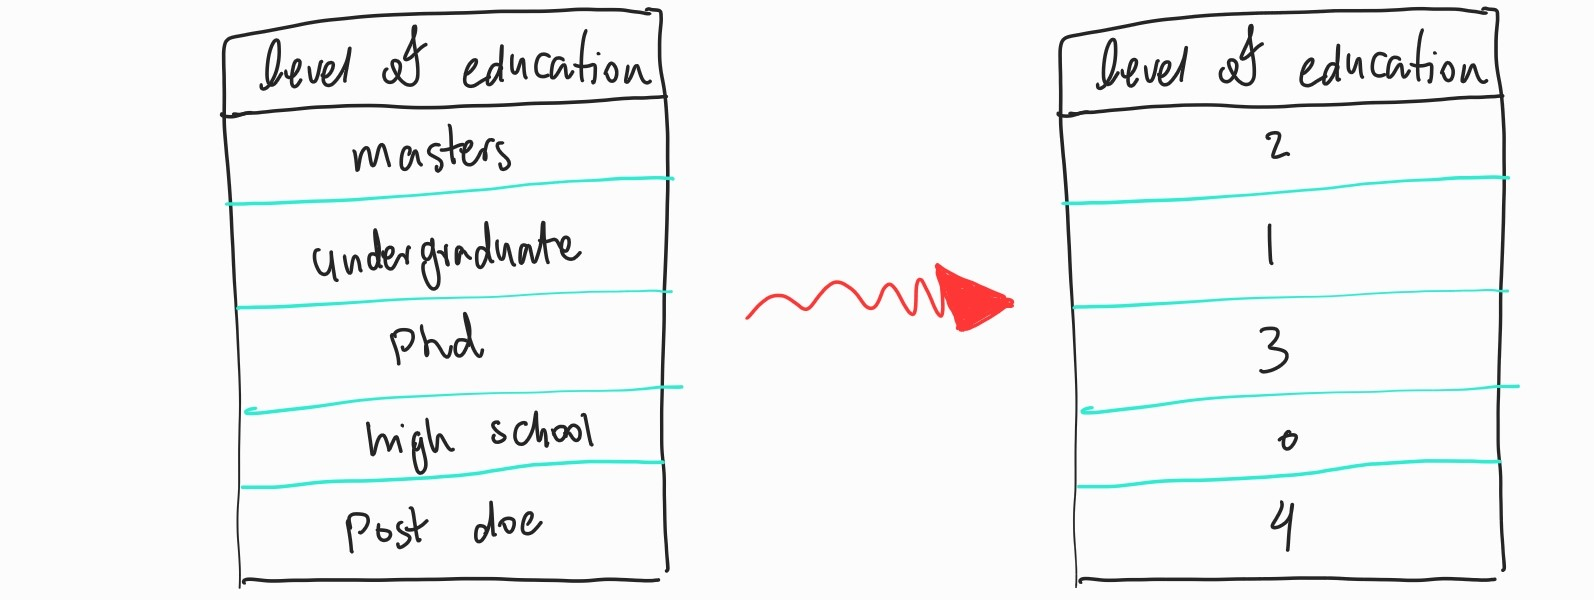

In [57]:
from sklearn.preprocessing import OrdinalEncoder

X_train_ordinal = X_train.copy()
X_valid_ordinal = X_valid.copy()

ordinal_maker = OrdinalEncoder()

X_train_ordinal[categorical_col] = ordinal_maker.fit_transform(X_train[categorical_col])
X_valid_ordinal[categorical_col] = ordinal_maker.transform(X_valid[categorical_col])


print("MAE from Approach 2 (Ordinal Encoding):")
print(get_mae(X_train_ordinal,X_valid_ordinal,y_train,y_valid)) 

MAE from Approach 2 (Ordinal Encoding):
166176.0778164668


**Approach 3:**

One-Hot Encoding

from https://www.kaggle.com/alexisbcook/categorical-variables#Three-Approaches

*   We set **handle_unknown='ignore'** to avoid errors when the validation data contains classes that aren't represented in the training data
*   we set **sparse=False** to ensure that the encoded columns are returned as a numpy array (instead of a sparse matrix).





1.   Import One-hot encoder
2.   Apply it to categorical columns
3.   One-hot encoding removes index, put it back
4.   Remove categorical columns
5.   Replace categorical columns with one-hot encoded columns



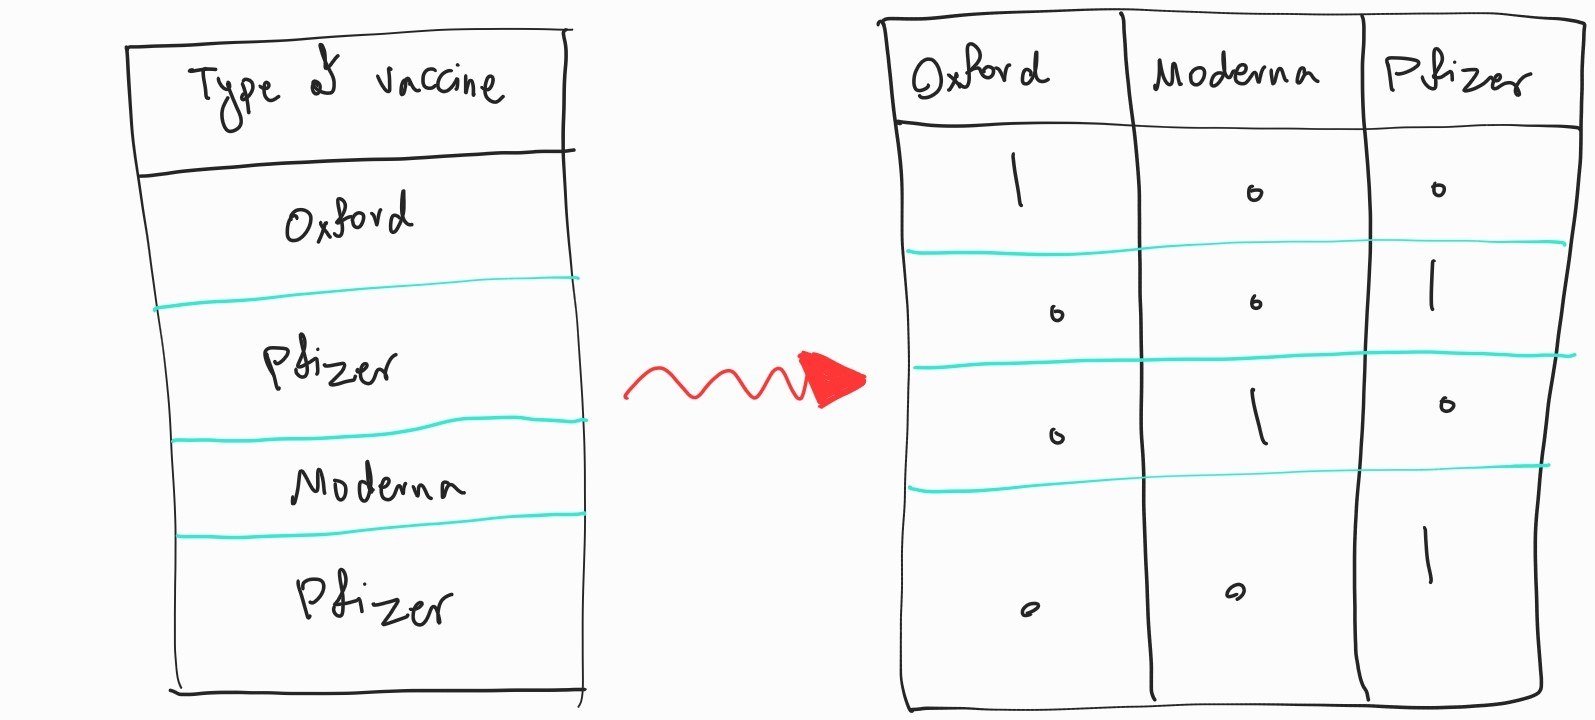

In [56]:
#1
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse= False)

#2
hot_encoded_col_X_train = pd.DataFrame(hot_encoder.fit_transform(X_train[categorical_col]))
hot_encoded_col_X_valid = pd.DataFrame(hot_encoder.transform(X_valid[categorical_col]))

#3 ???
hot_encoded_col_X_train.index = X_train.index
hot_encoded_col_X_valid.index = X_valid.index

#4
X_train_temp = X_train.drop(categorical_col, axis=1)
X_valid_temp = X_valid.drop(categorical_col, axis=1)

#5
hot_X_train = pd.concat([X_train_temp,hot_encoded_col_X_train], axis=1)
hot_X_valid = pd.concat([X_valid_temp,hot_encoded_col_X_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(get_mae(hot_X_train,hot_X_valid,y_train,y_valid))



MAE from Approach 3 (One-Hot Encoding):
166089.4893009678


# As you can see, generally one-hot encoding performed best